In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from snAPI.Main import *
import pandas as pd
sys.path.append("../")
from HH import HH_T3
from Functions import *

In [32]:
def GetPos(filename):
    parts=filename[:-4].split('_')
    x=float(parts[1])
    y=float(parts[2])
    return x,y
def GetGatedCounts(filename,T):
    sn.getDevice()
    sn.getFileDevice(filename)
    sn.initDevice(MeasMode.T3)
    t_resol=sn.deviceConfig['Resolution']/1000 #in ns
    sn.raw.measure()
    data = sn.raw.getData()
    channels=sn.raw.channel(data)
    dTimes=sn.raw.dTime_T3(data)*t_resol
    sn.closeDevice()
    print(dTimes)
    return np.size(dTimes)

In [33]:
def ImageData(pathtoPTUs,gate):
    arr=np.array([0,0,0])
    for file in os.listdir(pathtoPTUs):
        if file[0:3]=='PTU':
            x,y=GetPos(file)
            c=GetGatedCounts(pathtoPTUs+file,gate)
            print(c)
            arr=np.vstack((arr,[x,y,c]))
    arr=np.delete(arr,0,0)
    return arr

In [34]:
filename='../../../Acquisition2/Data/Trial/PTU_6.ptu'
os.listdir(filename)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '../../../Acquisition2/Data/Trial/PTU_6.ptu'

In [35]:
sn=snAPI()

In [36]:
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T3)
t_resol=sn.deviceConfig['Resolution']/1000 #in ns
sn.raw.measure()
data = sn.raw.getData()
channels=sn.raw.channel(data)
dTimes=sn.raw.dTime_T3(data)[np.where(channels!=64)]*t_resol
dataChannels=channels[np.where(channels!=64)]

In [37]:
data

array([], dtype=uint32)

In [38]:
pathtoPTUs='../../../Acquisition2/Data/Trial/'

In [39]:
#os.listdir('../../../Acquisition/Acquisition2/Data/Trial/')

In [40]:
d=ImageData(pathtoPTUs,0)

[169.728 617.984 956.672 ... 664.576 220.928 669.952]
396778
[518.144 845.312 995.584 ... 199.936 960.256 949.248]
396316
[594.176 503.296 899.072 ... 125.44  410.112 215.04 ]
398922
[799.744  42.24  456.192 ... 153.344 702.464 172.032]
400463
[563.456 990.464 509.952 ... 793.6   276.48  536.576]
401424
[600.064  82.432 984.32  ... 564.48  864.512  33.28 ]
403331
[963.584 765.44  767.488 ... 799.488 243.968  80.64 ]
405007
[175.616 131.072 979.456 ... 673.28  264.704 835.072]
406090
[573.44  230.912 992.    ... 874.752 172.288 221.952]
395478
[390.656 112.64  644.352 ... 676.608 871.936  22.784]
396008
[512.256 647.68  328.704 ... 141.056  86.272 522.24 ]
395660
[707.584 523.008 515.84  ... 114.688 156.672 892.416]
397391
[541.696  54.016 859.904 ... 432.64   40.192 847.872]
397432
[951.296 588.8   162.56  ... 847.616 141.056 771.072]
397521
[763.648 233.216  12.032 ... 170.496 951.552 969.984]
399568
[787.2   437.76  216.064 ... 778.24  351.488 124.672]
401273
[701.44  200.448 805.632

In [41]:
d.T[2]

array([396778., 396316., 398922., 400463., 401424., 403331., 405007.,
       406090., 395478., 396008., 395660., 397391., 397432., 397521.,
       399568., 401273., 401971., 403380., 394870., 396846., 397007.,
       393603., 396873., 396766., 397795., 398894., 399400., 401479.,
       396512., 397090., 399031., 398489., 398514., 398536., 397472.,
       398747., 399026., 398955., 401111., 401670., 402091., 401688.,
       400823., 399875., 400121., 398170., 399870., 399561., 403410.,
       403684., 406568., 406494., 405217., 404206., 402323., 400607.,
       401905., 398114., 407724., 409104., 412219., 410111., 409458.,
       406761., 405771., 404498., 403071., 401937., 412335., 412868.,
       416487., 414726., 412596., 410177., 406774., 403512., 400379.,
       401707., 418867., 420350., 397199., 397871., 401396., 402378.,
       406090., 407148., 408072., 411164., 398285., 395275., 401193.,
       402280., 404264., 406328., 408612., 410623., 414092., 415764.,
       400671., 4005

In [42]:
xs=np.unique(d.T[0])
ys=np.unique(d.T[1])
m=np.zeros((np.size(xs),np.size(ys)))
for point in d:
    ind_x=np.where(xs==point[0])[0][0]
    ind_y=np.where(ys==point[1])[0][0]
    m[ind_x,ind_y]=point[2]   

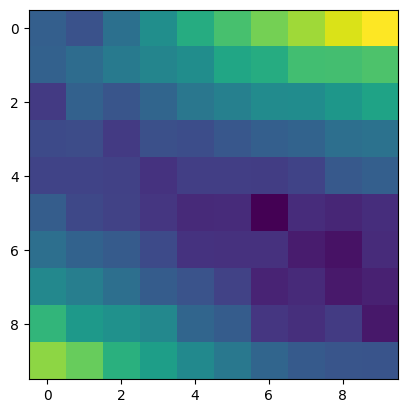

In [43]:
plt.imshow(m)